# A few statistics on the data

In [69]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


file = 'Sample_data/MI-2013-11-04_processed.csv'

d = pd.read_csv(file, sep = '\t')
d.drop("Time",axis=1,inplace=True)
d.set_index(["Square","Country","Month","Day","WDay","Hour"],inplace=True)
d.head(5)

SMSin    SMSout    Callin   Callout  \
Square Country Month Day WDay Hour                                           
1520   0       11    3   6    23    0.008057  0.000000  0.000000  0.000000   
       39      11    3   6    23    0.034471  0.073537  0.016114  0.008476   
       46      11    3   6    23    0.000000  0.000000  0.000000  0.000000   
       0       11    3   6    23    0.000210  0.000000  0.000000  0.000000   
       39      11    3   6    23    0.077334  0.079980  0.022953  0.000630   

                                    Internet  
Square Country Month Day WDay Hour            
1520   0       11    3   6    23    0.000000  
       39      11    3   6    23    3.325684  
       46      11    3   6    23    0.031009  
       0       11    3   6    23    0.000000  
       39      11    3   6    23    3.094838

### 1. Intensity by hour during a day

/home/cgaydon/Ressources/anaconda3/envs/Milano/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


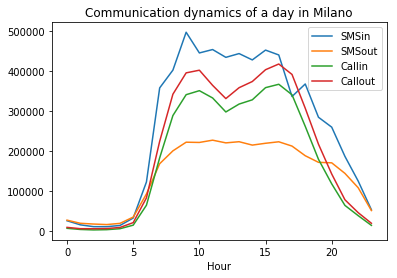

In [71]:
dHour = d.groupby(level = ["Hour"]).sum()
dHour.plot(y = ["SMSin","SMSout","Callin","Callout"], use_index=True, title = "Communication dynamics of a day in Milano")

/home/cgaydon/Ressources/anaconda3/envs/Milano/lib/python3.5/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


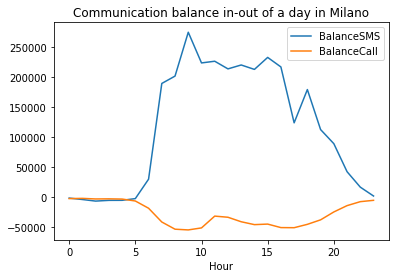

In [72]:
dHour["BalanceSMS"] = dHour["SMSin"]- dHour["SMSout"]
dHour["BalanceCall"] =  dHour["Callin"]- dHour["Callout"]
#dHour.head
dHour.plot(y = ["BalanceSMS","BalanceCall"], use_index=True, title = "Communication balance in-out of a day in Milano")

If the data is considered exhaustive, would this means that Milano's inhabitant mostly sms outside of their city, and are called from outside ?

### Intensity by hour during a week

later : we need to load seven different txt files into one to get this, as a file = a day... 

TODO : preprocess all MI files without header, stack them, add header, and save.

### 2. Intensity by square

In [73]:
dSquare = d.groupby(level = ["Square"]).sum()
dSquare.reset_index("Square",inplace=True)
dSquare['j'] = dSquare["Square"]%100
dSquare['i'] = ((dSquare["Square"]-dSquare["j"])/100).apply(lambda x : int(x))
dSquare.head()

,Square,SMSin,SMSout,Callin,Callout,Internet,j,i
0,1520,72.251448,34.129383,62.900796,68.624879,722.211242,20,15
1,1521,68.044490,32.860015,60.458395,66.819818,658.371982,21,15
2,1522,64.373074,31.283024,55.581142,62.105703,606.962531,22,15
3,1523,61.670182,30.146027,52.059266,58.692297,569.897036,23,15
4,1524,61.670182,30.146027,52.059266,58.692297,569.897036,24,15


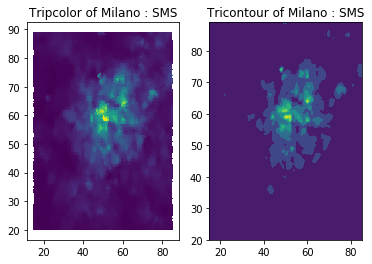

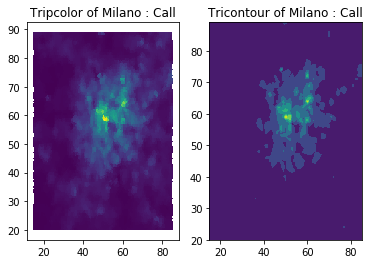

In [76]:
dSquare["SMS"] = dSquare["SMSin"]+dSquare["SMSout"]
dSquare["Call"] = dSquare["Callin"] + dSquare["Callout"]
for label in ["SMS","Call"]:
    fig, (ax, ax2)=plt.subplots(ncols=2)
    ax.set_title("Tripcolor of Milano : "+label)
    ax.tripcolor(dSquare["i"], dSquare["j"], dSquare[label])
    ax2.set_title("Tricontour of Milano : " +label)
    ax2.tricontourf(dSquare["i"], dSquare["j"], dSquare[label])

    plt.show()